## THESIS: Is there a notable different in what makes a high quality red wine vs a high quality white?

### To test this we will build a classifier that will predict if the wine is of high quality or not, and if the model is accurate we can compare the the coefficients of the two models.

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [76]:
red = pd.read_csv('winequality-red.csv', sep = ';')
white = pd.read_csv('winequality-white.csv', sep = ';')

In [77]:
foo = pd.DataFrame(white.info())
foo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


""


In [78]:
print(red.shape)
red.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [79]:
print(white.shape)
white.head()

(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [80]:
white.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [81]:
# at some point I should concat these df's together on a color column identifying if it's red or white.

In [82]:
red.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [83]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### Analyzing the Distributions of Each of the Variables.

#### From looking at these distribution plots below we can see that the distributions of red and white wine are significantly different from each other. The only graph that is similar is the last one, which is the Quality rating, but to answer our initial question, if the same attributes define  a higher quality wine, we need to investigate further.

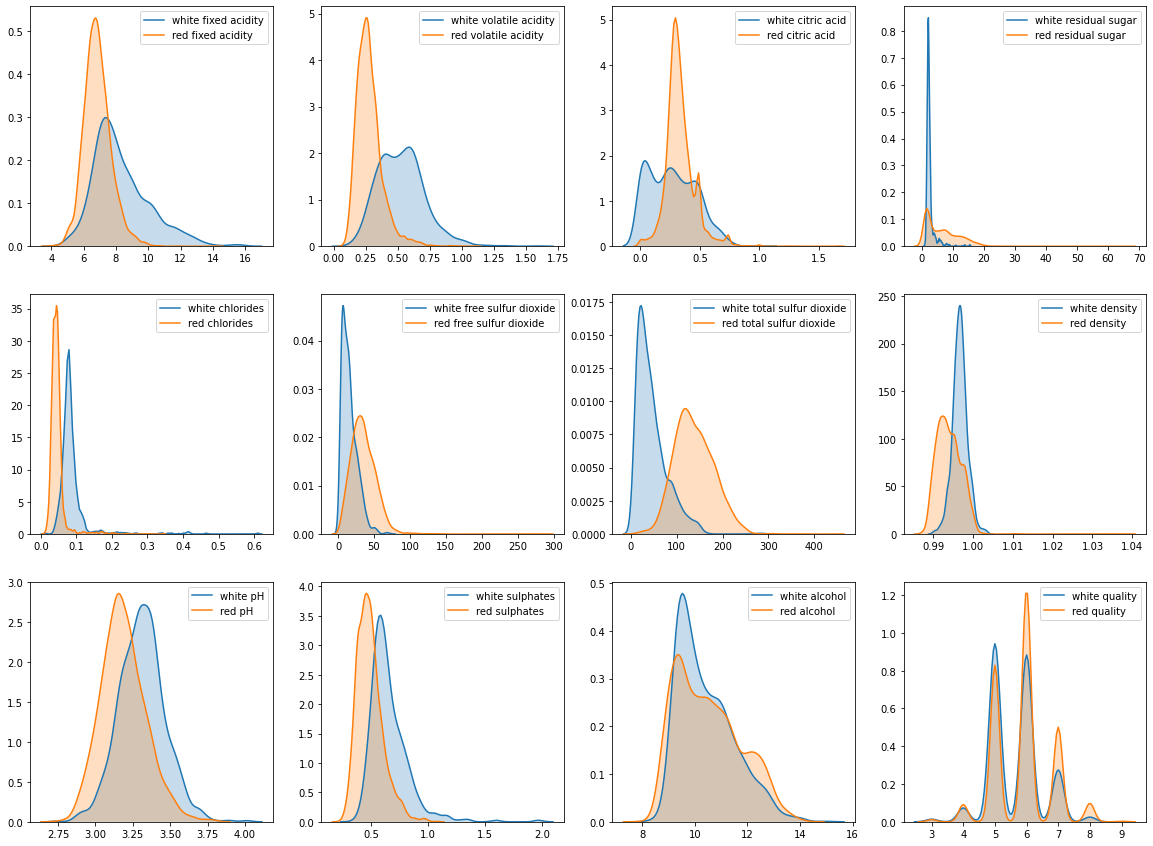

In [84]:
plt.figure(figsize=(20,15))

for i in range(len(red.columns)):
    plt.subplot(3,4,i+1)
    sns.kdeplot(red.iloc[:,i], shade='fill')
    sns.kdeplot(white.iloc[:,i], shade = 'fill')
    plt.legend(['white ' + red.columns[i],'red '+ white.columns[i]])


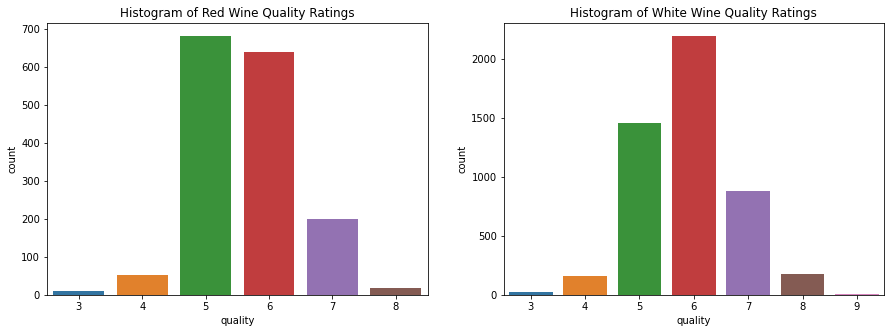

In [85]:
# Here is a clearly look at the distibution of both red and white quality ratings.

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(red.quality)
plt.title('Histogram of Red Wine Quality Ratings')

plt.subplot(1,2,2)
sns.countplot(white.quality)
plt.title('Histogram of White Wine Quality Ratings')

plt.show()

### To make this into a classification problem we will convet wines with a rating of 7 and up into a boolean where a 1 is a high quality wine and 0 is for a low quality wine.

In [86]:
red['high_quality'] = [1 if rating >= 7 else 0 for rating in red['quality']]
white['high_quality'] = [1 if rating >= 7 else 0 for rating in white['quality']]


In [87]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [88]:
#Dropping numerical quality rating (as we now have a categorical one)

red.drop(columns='quality',inplace=True)
white.drop(columns='quality',inplace=True)


In [89]:
red.high_quality.value_counts()

0    1382
1     217
Name: high_quality, dtype: int64

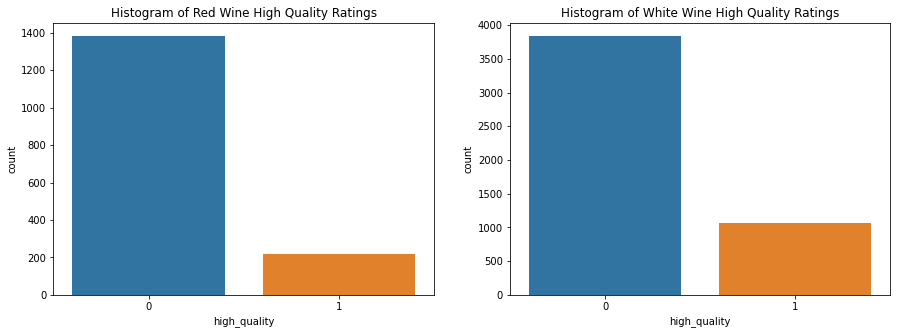

In [91]:
# Lets look at the classified quality scores

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(red.high_quality)
plt.title('Histogram of Red Wine High Quality Ratings')

plt.subplot(1,2,2)
sns.countplot(white.high_quality)
plt.title('Histogram of White Wine High Quality Ratings')

plt.show()

# Modeling

In [94]:
# First need to split the data into training and testing datasets.

from sklearn.model_selection import train_test_split

# declaring response and explanatory variables.

red_X = red.drop(columns='high_quality')
red_y = red.high_quality

white_X = white.drop(columns='high_quality')
white_y = white.high_quality

# splitting the data 
red_X_train, red_X_test, red_y_train, red_y_test = train_test_split(red_X, red_y, test_size=.25, random_state=33)

white_X_train, white_X_test, white_y_train, white_y_test = train_test_split(white_X,white_y, test_size=.25, random_state=33)



### Sklearn's Logistic Regression

In [ ]:
from sklearn.metrics import classification_report

In [100]:
from sklearn.linear_model import LogisticRegression

# Red Logistic Regression Predictions

red_clf = LogisticRegression(random_state=33).fit(red_X_train, red_y_train)
red_y_pred = red_clf.predict(red_X_test)

print(classification_report(red_y_test, red_y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       342
           1       0.62      0.22      0.33        58

    accuracy                           0.87       400
   macro avg       0.75      0.60      0.63       400
weighted avg       0.84      0.87      0.84       400



/Users/Mateo/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [104]:
# White Logistic Regression Predictions

white_clf = LogisticRegression(random_state=33).fit(white_X_train, white_y_train)
white_y_pred = white_clf.predict(white_X_test)

print(classification_report(white_y_test, white_y_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       968
           1       0.53      0.21      0.31       257

    accuracy                           0.80      1225
   macro avg       0.68      0.58      0.59      1225
weighted avg       0.76      0.80      0.76      1225



/Users/Mateo/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Random Forest

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
# red Random Forest Predictions

red_rf = RandomForestClassifier(random_state=33)

red_rf.fit(red_X_train, red_y_train)
red_y_pred2 = red_rf.predict(red_X_test)

print(classification_report(red_y_test, red_y_pred2))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       342
           1       0.78      0.43      0.56        58

    accuracy                           0.90       400
   macro avg       0.85      0.71      0.75       400
weighted avg       0.89      0.90      0.89       400



In [112]:
# White Random Forest Predictions

white_rf = RandomForestClassifier(random_state=33)

white_rf.fit(white_X_train, white_y_train)
white_y_pred2 = white_rf.predict(white_X_test)

print(classification_report(white_y_test, white_y_pred2))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       968
           1       0.83      0.58      0.68       257

    accuracy                           0.89      1225
   macro avg       0.86      0.77      0.81      1225
weighted avg       0.88      0.89      0.88      1225



## XGBoost

In [113]:
import xgboost as xgb

#Red Predictions with XGBoost

red_xgb = xgb.XGBClassifier(random_state=33)
red_xgb.fit(red_X_train, red_y_train)
red_y_pred3 = red_xgb.predict(red_X_test)
print(classification_report(red_y_test, red_y_pred3))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       342
           1       0.78      0.50      0.61        58

    accuracy                           0.91       400
   macro avg       0.85      0.74      0.78       400
weighted avg       0.90      0.91      0.90       400



In [114]:
#White Predictions with XGBoost

white_xgb = xgb.XGBClassifier(random_state=33)
white_xgb.fit(white_X_train, white_y_train)
white_y_pred3 = white_xgb.predict(white_X_test)
print(classification_report(white_y_test, white_y_pred3))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93       968
           1       0.78      0.61      0.68       257

    accuracy                           0.88      1225
   macro avg       0.84      0.78      0.80      1225
weighted avg       0.88      0.88      0.88      1225



## Analyzing Feature Importance

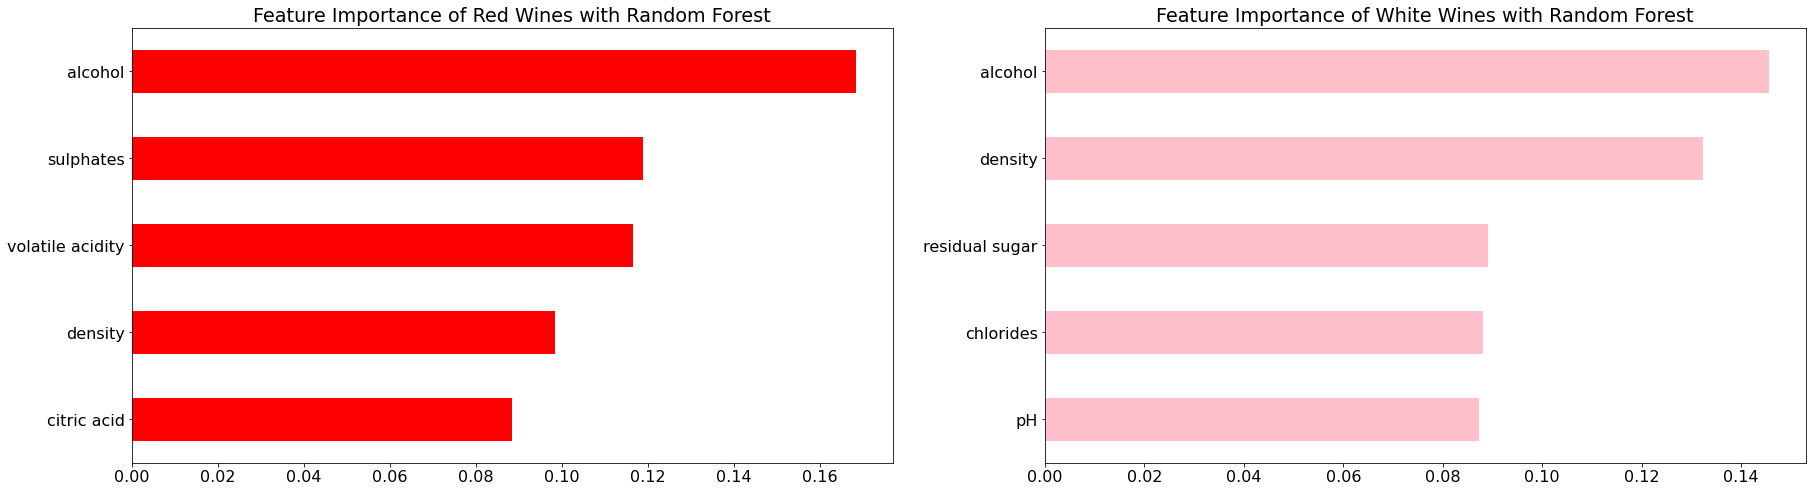

In [171]:
# Random Forest
plt.figure(figsize=(30,8))

plt.subplot(1,2,1)
feat_importances = pd.Series(red_rf.feature_importances_, index=red_X.columns).sort_values().tail()
feat_importances.plot(kind='barh', color='red')
plt.title('Feature Importance of Red Wines with Random Forest')

plt.subplot(1,2,2)
feat_importances_white = pd.Series(white_rf.feature_importances_, index=white_X.columns).sort_values().tail()
feat_importances_white.plot(kind='barh',color='pink')
plt.title('Feature Importance of White Wines with Random Forest')

plt.rcParams.update({'font.size': 16})
plt.show()

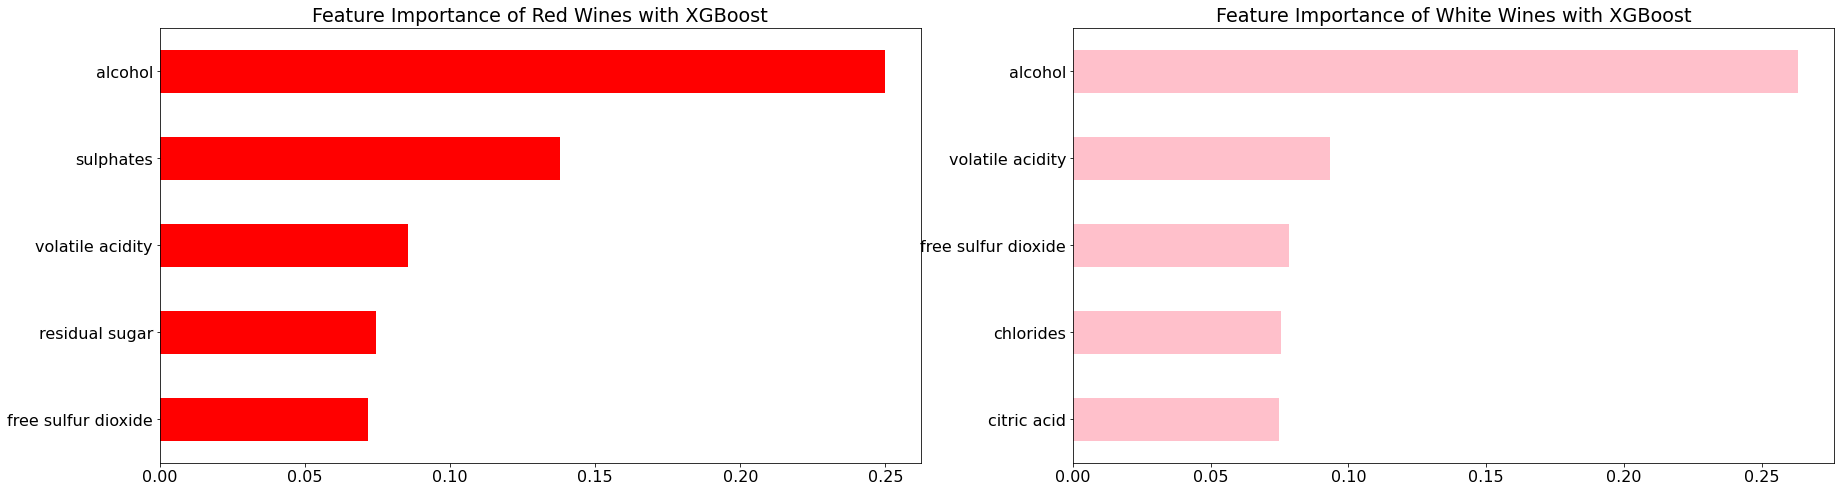

In [170]:
# XGBoost

plt.figure(figsize=(30,8))

plt.subplot(1,2,1)
feat_importances = pd.Series(red_xgb.feature_importances_, index=red_X.columns).sort_values().tail()
feat_importances.plot(kind='barh', color='red')
plt.title('Feature Importance of Red Wines with XGBoost')

plt.subplot(1,2,2)
feat_importances_white = pd.Series(white_xgb.feature_importances_, index=white_X.columns).sort_values().tail()
feat_importances_white.plot(kind='barh',color='pink')
plt.title('Feature Importance of White Wines with XGBoost')

plt.rcParams.update({'font.size': 16})


plt.show()

### Conclusion

For red and white models, alcohol is greatest predictor for quality. Beyond that, for reds, sulphates and volatile acidity are the next most important factors. For whites, density and residual sugar are the next most important features.

From these results we can conclude that beyond higher alcohol content, there are distinct attributes that determine a high quality wine. However, noting the Recall score for Reds was 0.5 but for Whites was 0.58, perhaps having a larger sample size would have increased model performance and highlighted different features as important.

So next time you’re buying a bottle of wine, ask the Sommelier for a red wine high in alcohol, sulphides, and volatile acidity or a white wine high in alcohol, density, and residual sugar! 